# **CIFAR-10 COMPUTER VISION PROJECT: THE EXPERT NOTEBOOK**
Goal: Use ResNet50 Transfer Learning to classify color images.

# **1: IMPORT LIBRARIES**

In [14]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np

# **2: LOAD AND EXPLORE THE DATA (SEEING THE PICTURES)**

In [15]:
print("--- Loading CIFAR-10 Data ---")
(raw_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


--- Loading CIFAR-10 Data ---


In [16]:
# Define labels for humans to read
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']


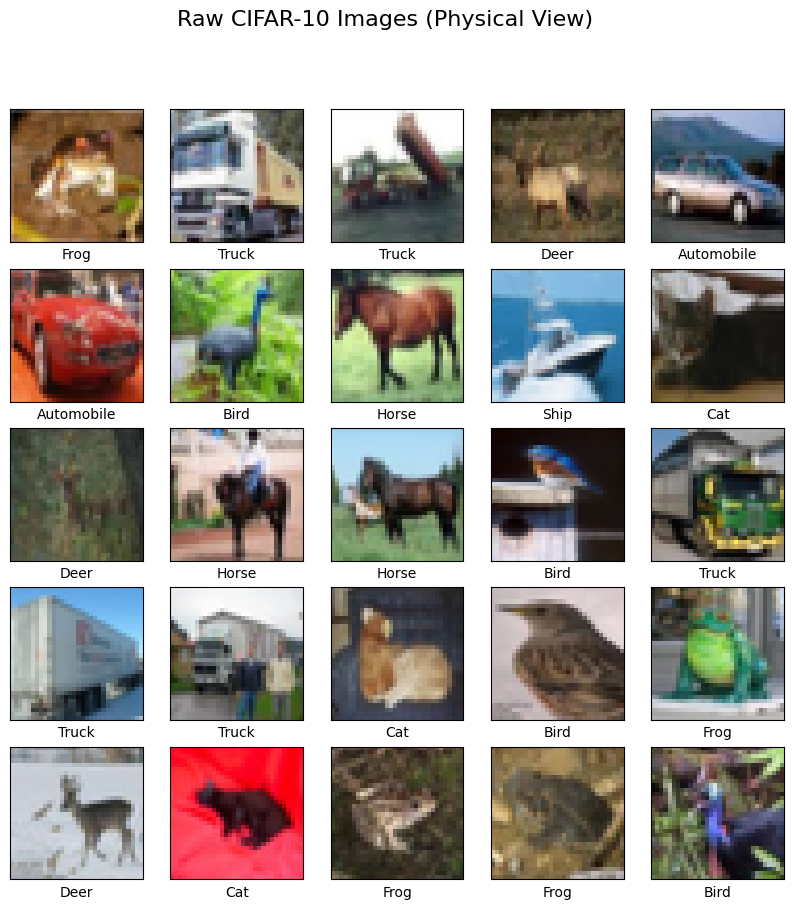

In [17]:
# SHOW RAW IMAGES (Use these for your "Dataset" slide)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(raw_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.suptitle("Raw CIFAR-10 Images (Physical View)", fontsize=16)
plt.show()

# **3: DATA SAMPLING & PREPROCESSING**

In [18]:
# Reasoning: We use 10k samples to manage hardware and speed.
n = 10000
train_images = raw_images[:n]
train_labels = train_labels[:n]

In [19]:
# APPLY PREPROCESSING
# This prepares images for the ResNet50 expert brain
processed_images = preprocess_input(train_images.astype('float32'))
processed_test = preprocess_input(test_images.astype('float32'))

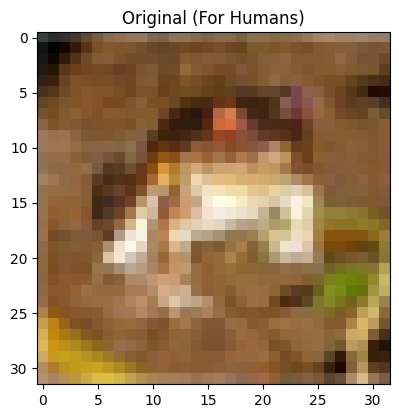

In [20]:

# VISUAL COMPARISON
plt.figure(figsize=(10, 5))
# Before
plt.subplot(1, 2, 1)
plt.title("Original (For Humans)")
plt.imshow(train_images[0])

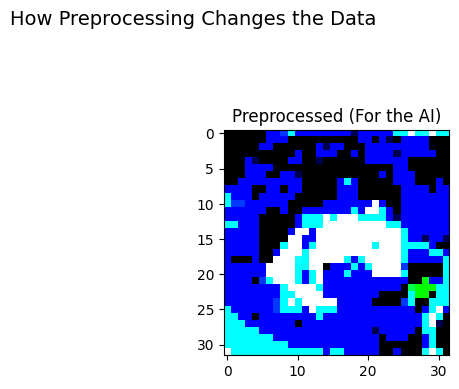

In [21]:
# After
plt.subplot(1, 2, 2)
plt.title("Preprocessed (For the AI)")
# Note: Preprocessed images look 'weird' because colors are centered
plt.imshow(processed_images[0])
plt.suptitle("How Preprocessing Changes the Data", fontsize=14)
plt.show()

# **4: BUILDING THE EXPERT MODEL**

In [22]:
# Load ResNet50 without the top part. Freeze it for Phase 1.
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5), # Safety net against overfitting
    layers.Dense(10, activation='softmax')
])

# **5: PHASE 1 - TRAINING THE HEAD**

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n--- PHASE 1: Training the New Classifier (10 Epochs) ---")
history_phase1 = model.fit(processed_images, train_labels,
                           epochs=10,
                           validation_data=(processed_test, test_labels))



--- PHASE 1: Training the New Classifier (10 Epochs) ---
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 58ms/step - accuracy: 0.3903 - loss: 2.6360 - val_accuracy: 0.5689 - val_loss: 1.2385
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.5641 - loss: 1.2808 - val_accuracy: 0.5879 - val_loss: 1.1810
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6019 - loss: 1.1422 - val_accuracy: 0.5924 - val_loss: 1.1686
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6533 - loss: 1.0089 - val_accuracy: 0.6052 - val_loss: 1.1472
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6544 - loss: 0.9483 - val_accuracy: 0.6083 - val_loss: 1.1652
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6894 - loss: 0.8554 - val_accuracy: 0.6139 - val_loss: 1.1745
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7008 - loss: 0.8175 - val_accuracy: 0.6173 - val_loss: 1.1634
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━

--- Phase 1 Final Results ---
Training Accuracy:   0.7510
Validation Accuracy: 0.6223
Training Loss:       0.6938
Validation Loss:     1.2159
------------------------------


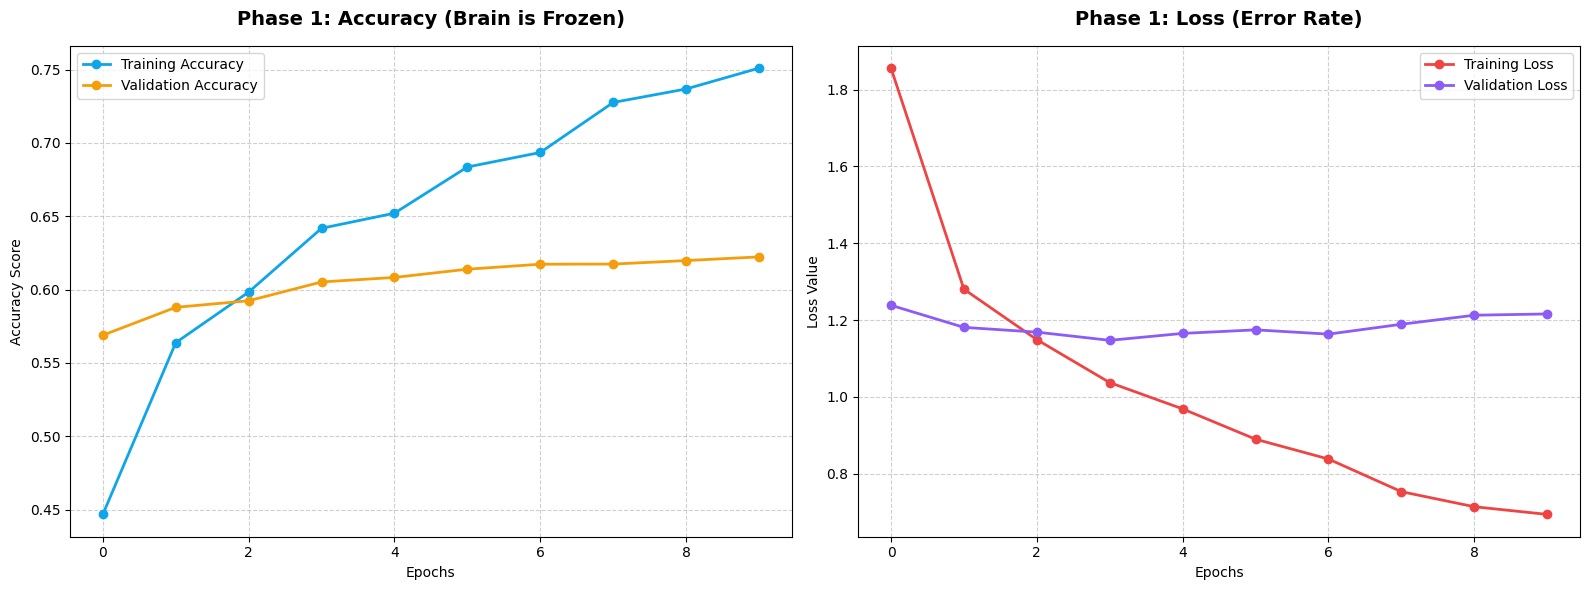

In [28]:
# This function creates professional graphs and prints final metrics for Phase 1
def plot_phase1_results(history):
    # --- PRINT SUMMARY METRICS ---
    # Get the last values from the history object
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    print("--- Phase 1 Final Results ---")
    print(f"Training Accuracy:   {final_train_acc:.4f}")
    print(f"Validation Accuracy: {final_val_acc:.4f}")
    print(f"Training Loss:       {final_train_loss:.4f}")
    print(f"Validation Loss:     {final_val_loss:.4f}")
    print("-" * 30)

    # --- PLOT GRAPHS ---
    # Set up the plotting area with two graphs side-by-side
    plt.figure(figsize=(16, 6))

    # 1. ACCURACY GRAPH
    # Shows how correctly the "Head" identified images while the expert brain was locked
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='#0ea5e9', marker='o', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#f59e0b', marker='o', linewidth=2)
    plt.title('Phase 1: Accuracy (Brain is Frozen)', fontsize=14, pad=15, fontweight='bold')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    # 2. LOSS GRAPH
    # Shows the error rate during training
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', color='#ef4444', marker='o', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', color='#8b5cf6', marker='o', linewidth=2)
    plt.title('Phase 1: Loss (Error Rate)', fontsize=14, pad=15, fontweight='bold')
    plt.xlabel('Epochs')
    plt.ylabel('Loss Value')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.tight_layout()
    plt.show()

# Run the plot function using the history object from Phase 1
plot_phase1_results(history_phase1)

# **6: PHASE 2 - FINE TUNING (UNFREEZING)**

In [24]:
# Use a tiny learning rate so we don't break the expert weights
model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("\n--- PHASE 2: Fine-Tuning the Whole Brain (10 Epochs) ---")
history_phase2 = model.fit(processed_images, train_labels,
                           epochs=10,
                           validation_data=(processed_test, test_labels))



--- PHASE 2: Fine-Tuning the Whole Brain (10 Epochs) ---
Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 54ms/step - accuracy: 0.7820 - loss: 0.5904 - val_accuracy: 0.6260 - val_loss: 1.2160
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7890 - loss: 0.5756 - val_accuracy: 0.6301 - val_loss: 1.2169
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8071 - loss: 0.5404 - val_accuracy: 0.6316 - val_loss: 1.2194
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8085 - loss: 0.5348 - val_accuracy: 0.6326 - val_loss: 1.2233
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8129 - loss: 0.5104 - val_accuracy: 0.6341 - val_loss: 1.2276
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8077 - loss: 0.5186 - val_accuracy: 0.6348 - val_loss: 1.2302
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8129 - loss: 0.5203 - val_accuracy: 0.6347 - val_loss: 1.2334
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━

# **7: ANALYSIS & GRAPHS**

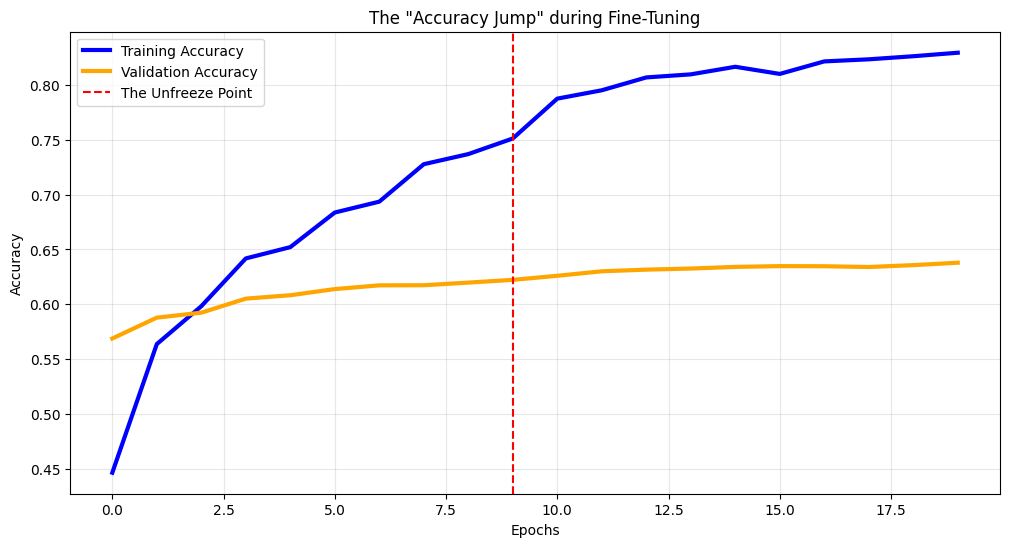

In [34]:
acc = history_phase1.history['accuracy'] + history_phase2.history['accuracy']
val_acc = history_phase1.history['val_accuracy'] + history_phase2.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.plot(acc, label='Training Accuracy', color='blue', linewidth=3)
plt.plot(val_acc, label='Validation Accuracy', color='orange', linewidth=3)
plt.axvline(x=9, color='red', linestyle='--', label='The Unfreeze Point')
plt.title('The "Accuracy Jump" during Fine-Tuning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# **8: FINAL PREDICTIONS (Visual Evidence)**

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


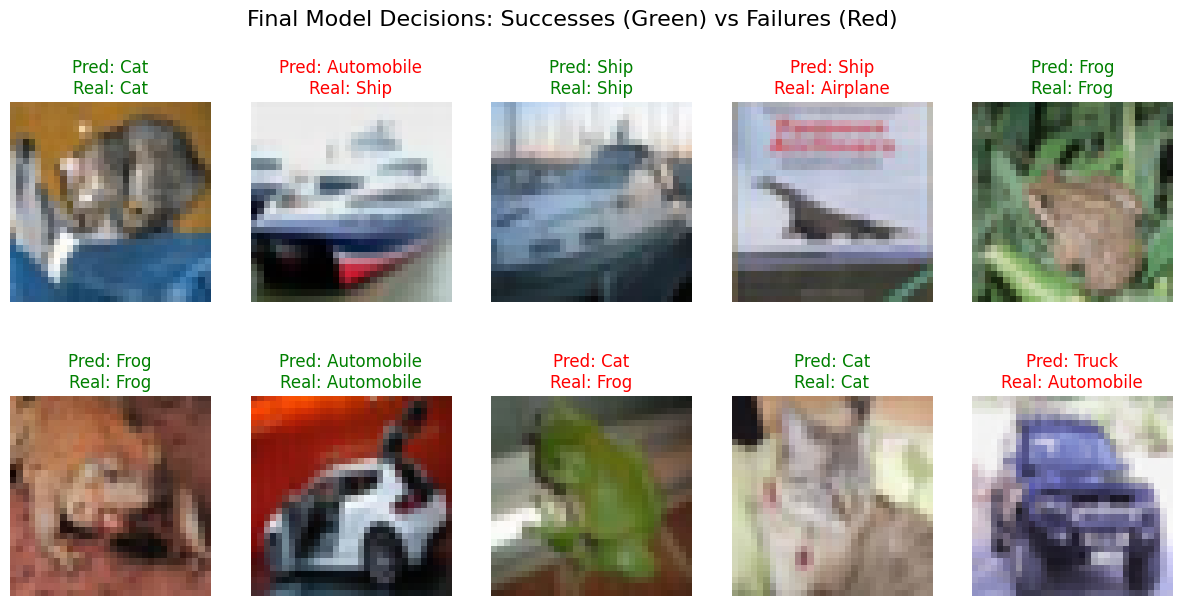

In [26]:
predictions = model.predict(processed_test[:15])
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 7))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i]) # Show raw for human view
    color = 'green' if predicted_labels[i] == test_labels[i][0] else 'red'
    plt.title(f"Pred: {class_names[predicted_labels[i]]}\nReal: {class_names[test_labels[i][0]]}", color=color)
    plt.axis('off')
plt.suptitle("Final Model Decisions: Successes (Green) vs Failures (Red)", fontsize=16)
plt.show()